In [1]:
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time as time
pd.options.mode.chained_assignment = None
from api_key import api_key

In [2]:
key=api_key

In [3]:
#list of random latitudes and longitudes
data= pd.DataFrame(columns =['Latitude',"Longitude","City","Temperature",
                             "Humidity","Clouds","Wind Speed"])
lat = []
lng = []

for x in range(0,3000):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-181,181))
data['Latitude']=lat
data['Longitude']=lng
data.head()

,Latitude,Longitude,City,Temperature,Humidity,Clouds,Wind Speed
0,45.418224,-90.805409,NaN,NaN,NaN,NaN,NaN
1,-61.251674,109.967316,NaN,NaN,NaN,NaN,NaN
2,36.061165,137.260496,NaN,NaN,NaN,NaN,NaN
3,54.442846,-174.945735,NaN,NaN,NaN,NaN,NaN
4,-67.173359,-2.117031,NaN,NaN,NaN,NaN,NaN


In [4]:
#find the cities w r t coordinates
cities =[]
for index, row in data.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities.append(city.city_name)
data['City']=cities
data.head()
len(data)

3000

In [5]:
#check for and remove duplicates and make sure there are atleast 500 unique cities to test
new_data = data.drop_duplicates("City",keep="first")
len(new_data)

988

In [6]:
#Arrays are used to store temperature, humidity, clouds, and wind speed 
temp = []
humidity =[]
clouds = []
wind = []
counter = 0
valid_data_counter = 0

url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#iterate through the rows to pull data from the api 

In [8]:
for index, row in new_data.iterrows():
    if(valid_data_counter < 500):
        counter +=1
        city = row["City"]
        target_url = url+city+"&appid="+key+"&units="+units
        print("City Number "+str(counter))
        print("City Name is "+row["City"])
        print(target_url)
    
        info = req.get(target_url).json()
        if (info['cod'] != "404"):    
                    valid_data_counter +=1
                    temp.append(info['main']['temp'])
                    humidity.append(info['main']['humidity'])
                    clouds.append(info['clouds']['all'])
                    wind.append(info['wind']['speed'])
                    print("Data Fetched and Processed: Still Remaining: " + str(500-valid_data_counter))
    
                    time.sleep(1)
                    print("__________________________________________________________________________________________")
        else:
                    temp.append("No Response from API")
                    humidity.append("No Response from API")
                    clouds.append("No Response from API")
                    wind.append("No Response from API")
    
                    print("No Response from API: Still Remaining: " + str(500-valid_data_counter))
                    print("__________________________________________________________________________________________")
    else:
        temp.append("Required No. of Cities Reached")
        humidity.append("Required No. of Cities Reached")
        clouds.append("Required No. of Cities Reached")
        wind.append("Required No. of Cities Reached")
              
          
    
        #print("Total "+str(counter)+ " cities traversed for having "+ str(valid_data_counter) +" valid data.")
print("=============================================SUMMARY===================================================")
print("Total "+str(counter)+ " out of "+ str(len(new_data)) +" cities traversed for having "+ str(valid_data_counter) +" valid data.")
print("=============================================FINISHED==================================================")
#assign the values from the arrays to the data frame
new_data["Temperature"]=temp
new_data["Humidity"]=humidity
new_data["Clouds"]=clouds
new_data["Wind Speed"]=wind

City Number 1
City Name is chippewa falls
https://api.openweathermap.org/data/2.5/weather?q=chippewa falls&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 499
__________________________________________________________________________________________
City Number 2
City Name is albany
https://api.openweathermap.org/data/2.5/weather?q=albany&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 498
__________________________________________________________________________________________
City Number 3
City Name is takayama
https://api.openweathermap.org/data/2.5/weather?q=takayama&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 497
__________________________________________________________________________________________
City Number 4
City Name is provideniya
https://api.openweathermap.org/data/2.5/weather?q=provideniya&appid=c2747a1a47120dfe77

Data Fetched and Processed: Still Remaining: 475
__________________________________________________________________________________________
City Number 30
City Name is vardo
https://api.openweathermap.org/data/2.5/weather?q=vardo&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 474
__________________________________________________________________________________________
City Number 31
City Name is saskylakh
https://api.openweathermap.org/data/2.5/weather?q=saskylakh&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 473
__________________________________________________________________________________________
City Number 32
City Name is castro
https://api.openweathermap.org/data/2.5/weather?q=castro&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 472
_________________________________________________________________________________________

Data Fetched and Processed: Still Remaining: 449
__________________________________________________________________________________________
City Number 59
City Name is alotau
https://api.openweathermap.org/data/2.5/weather?q=alotau&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 449
__________________________________________________________________________________________
City Number 60
City Name is ures
https://api.openweathermap.org/data/2.5/weather?q=ures&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 448
__________________________________________________________________________________________
City Number 61
City Name is tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 447
__________________________________________________________________________________________
Ci

Data Fetched and Processed: Still Remaining: 424
__________________________________________________________________________________________
City Number 88
City Name is riviere-au-renard
https://api.openweathermap.org/data/2.5/weather?q=riviere-au-renard&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 423
__________________________________________________________________________________________
City Number 89
City Name is umm lajj
https://api.openweathermap.org/data/2.5/weather?q=umm lajj&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 422
__________________________________________________________________________________________
City Number 90
City Name is izmaylovo
https://api.openweathermap.org/data/2.5/weather?q=izmaylovo&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 421
_____________________________________________________________

__________________________________________________________________________________________
City Number 116
City Name is port-gentil
https://api.openweathermap.org/data/2.5/weather?q=port-gentil&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 397
__________________________________________________________________________________________
City Number 117
City Name is ancud
https://api.openweathermap.org/data/2.5/weather?q=ancud&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 396
__________________________________________________________________________________________
City Number 118
City Name is trairi
https://api.openweathermap.org/data/2.5/weather?q=trairi&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 395
__________________________________________________________________________________________
City Number 119
City Name is smithers
ht

__________________________________________________________________________________________
City Number 145
City Name is kawalu
https://api.openweathermap.org/data/2.5/weather?q=kawalu&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 368
__________________________________________________________________________________________
City Number 146
City Name is bumba
https://api.openweathermap.org/data/2.5/weather?q=bumba&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 367
__________________________________________________________________________________________
City Number 147
City Name is bengkulu
https://api.openweathermap.org/data/2.5/weather?q=bengkulu&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 367
__________________________________________________________________________________________
City Number 148
City Name is derzhavinsk
https://api

Data Fetched and Processed: Still Remaining: 342
__________________________________________________________________________________________
City Number 174
City Name is shibarghan
https://api.openweathermap.org/data/2.5/weather?q=shibarghan&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 342
__________________________________________________________________________________________
City Number 175
City Name is lingao
https://api.openweathermap.org/data/2.5/weather?q=lingao&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 341
__________________________________________________________________________________________
City Number 176
City Name is yellowknife
https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 340
______________________________________________________________________________

Data Fetched and Processed: Still Remaining: 316
__________________________________________________________________________________________
City Number 203
City Name is bethel
https://api.openweathermap.org/data/2.5/weather?q=bethel&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 315
__________________________________________________________________________________________
City Number 204
City Name is lander
https://api.openweathermap.org/data/2.5/weather?q=lander&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 314
__________________________________________________________________________________________
City Number 205
City Name is viligili
https://api.openweathermap.org/data/2.5/weather?q=viligili&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 314
__________________________________________________________________________________________
C

__________________________________________________________________________________________
City Number 231
City Name is skjervoy
https://api.openweathermap.org/data/2.5/weather?q=skjervoy&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 292
__________________________________________________________________________________________
City Number 232
City Name is belaya gora
https://api.openweathermap.org/data/2.5/weather?q=belaya gora&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 291
__________________________________________________________________________________________
City Number 233
City Name is ola
https://api.openweathermap.org/data/2.5/weather?q=ola&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 290
__________________________________________________________________________________________
City Number 234
City Name is ulaangom
ht

Data Fetched and Processed: Still Remaining: 266
__________________________________________________________________________________________
City Number 260
City Name is chifeng
https://api.openweathermap.org/data/2.5/weather?q=chifeng&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 265
__________________________________________________________________________________________
City Number 261
City Name is haibowan
https://api.openweathermap.org/data/2.5/weather?q=haibowan&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 265
__________________________________________________________________________________________
City Number 262
City Name is sibu
https://api.openweathermap.org/data/2.5/weather?q=sibu&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 264
__________________________________________________________________________________________
Cit

__________________________________________________________________________________________
City Number 289
City Name is bambous virieux
https://api.openweathermap.org/data/2.5/weather?q=bambous virieux&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 242
__________________________________________________________________________________________
City Number 290
City Name is bubaque
https://api.openweathermap.org/data/2.5/weather?q=bubaque&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 241
__________________________________________________________________________________________
City Number 291
City Name is malwan
https://api.openweathermap.org/data/2.5/weather?q=malwan&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 241
__________________________________________________________________________________________
City Number 292
City Name is torba

__________________________________________________________________________________________
City Number 317
City Name is asau
https://api.openweathermap.org/data/2.5/weather?q=asau&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 219
__________________________________________________________________________________________
City Number 318
City Name is yurga
https://api.openweathermap.org/data/2.5/weather?q=yurga&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 218
__________________________________________________________________________________________
City Number 319
City Name is asosa
https://api.openweathermap.org/data/2.5/weather?q=asosa&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 217
__________________________________________________________________________________________
City Number 320
City Name is rehoboth
https://api.openweatherm

Data Fetched and Processed: Still Remaining: 193
__________________________________________________________________________________________
City Number 346
City Name is hermiston
https://api.openweathermap.org/data/2.5/weather?q=hermiston&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 192
__________________________________________________________________________________________
City Number 347
City Name is palabuhanratu
https://api.openweathermap.org/data/2.5/weather?q=palabuhanratu&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
No Response from API: Still Remaining: 192
__________________________________________________________________________________________
City Number 348
City Name is idil
https://api.openweathermap.org/data/2.5/weather?q=idil&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 191
________________________________________________________________________________

Data Fetched and Processed: Still Remaining: 168
__________________________________________________________________________________________
City Number 375
City Name is grindavik
https://api.openweathermap.org/data/2.5/weather?q=grindavik&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 167
__________________________________________________________________________________________
City Number 376
City Name is manokwari
https://api.openweathermap.org/data/2.5/weather?q=manokwari&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 166
__________________________________________________________________________________________
City Number 377
City Name is padang
https://api.openweathermap.org/data/2.5/weather?q=padang&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 165
______________________________________________________________________________

__________________________________________________________________________________________
City Number 404
City Name is cascais
https://api.openweathermap.org/data/2.5/weather?q=cascais&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 143
__________________________________________________________________________________________
City Number 405
City Name is sombrio
https://api.openweathermap.org/data/2.5/weather?q=sombrio&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 142
__________________________________________________________________________________________
City Number 406
City Name is armidale
https://api.openweathermap.org/data/2.5/weather?q=armidale&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 141
__________________________________________________________________________________________
City Number 407
City Name is guia de iso

Data Fetched and Processed: Still Remaining: 116
__________________________________________________________________________________________
City Number 433
City Name is bella union
https://api.openweathermap.org/data/2.5/weather?q=bella union&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 115
__________________________________________________________________________________________
City Number 434
City Name is glamoc
https://api.openweathermap.org/data/2.5/weather?q=glamoc&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 114
__________________________________________________________________________________________
City Number 435
City Name is neiafu
https://api.openweathermap.org/data/2.5/weather?q=neiafu&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 113
________________________________________________________________________________

Data Fetched and Processed: Still Remaining: 89
__________________________________________________________________________________________
City Number 461
City Name is galle
https://api.openweathermap.org/data/2.5/weather?q=galle&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 88
__________________________________________________________________________________________
City Number 462
City Name is puerto escondido
https://api.openweathermap.org/data/2.5/weather?q=puerto escondido&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 87
__________________________________________________________________________________________
City Number 463
City Name is atar
https://api.openweathermap.org/data/2.5/weather?q=atar&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 86
________________________________________________________________________________

No Response from API: Still Remaining: 62
__________________________________________________________________________________________
City Number 490
City Name is havre-saint-pierre
https://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 61
__________________________________________________________________________________________
City Number 491
City Name is vostok
https://api.openweathermap.org/data/2.5/weather?q=vostok&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 60
__________________________________________________________________________________________
City Number 492
City Name is pisco
https://api.openweathermap.org/data/2.5/weather?q=pisco&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 59
______________________________________________________________________________

Data Fetched and Processed: Still Remaining: 36
__________________________________________________________________________________________
City Number 519
City Name is klembivka
https://api.openweathermap.org/data/2.5/weather?q=klembivka&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 35
__________________________________________________________________________________________
City Number 520
City Name is tigil
https://api.openweathermap.org/data/2.5/weather?q=tigil&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 34
__________________________________________________________________________________________
City Number 521
City Name is jamame
https://api.openweathermap.org/data/2.5/weather?q=jamame&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 33
__________________________________________________________________________________________

__________________________________________________________________________________________
City Number 547
City Name is puerto leguizamo
https://api.openweathermap.org/data/2.5/weather?q=puerto leguizamo&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 11
__________________________________________________________________________________________
City Number 548
City Name is onokhoy
https://api.openweathermap.org/data/2.5/weather?q=onokhoy&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 10
__________________________________________________________________________________________
City Number 549
City Name is yasnyy
https://api.openweathermap.org/data/2.5/weather?q=yasnyy&appid=c2747a1a47120dfe77da0d1c5bfd583b&units=imperial
Data Fetched and Processed: Still Remaining: 9
__________________________________________________________________________________________
City Number 550
City Name is s

In [9]:
new_data.head()

,Latitude,Longitude,City,Temperature,Humidity,Clouds,Wind Speed
0,45.418224,-90.805409,chippewa falls,6.44,70,1,7.4
1,-61.251674,109.967316,albany,13.8,52,20,4.7
2,36.061165,137.260496,takayama,44.71,52,40,2.24
3,54.442846,-174.945735,provideniya,24.79,100,68,27.54
4,-67.173359,-2.117031,cape town,60.6,67,0,18.34


In [10]:
#Create a new dataframe which contains valid data by excluding the rows hving string No Response from API 
    #and Required No. of Cities Reached
    
my_new_data = new_data[new_data['Temperature']!='No Response from API'] 
my_new_data = my_new_data[my_new_data['Temperature']!='Required No. of Cities Reached'] 
my_new_data.head()

,Latitude,Longitude,City,Temperature,Humidity,Clouds,Wind Speed
0,45.418224,-90.805409,chippewa falls,6.44,70,1,7.4
1,-61.251674,109.967316,albany,13.8,52,20,4.7
2,36.061165,137.260496,takayama,44.71,52,40,2.24
3,54.442846,-174.945735,provideniya,24.79,100,68,27.54
4,-67.173359,-2.117031,cape town,60.6,67,0,18.34


In [11]:
len(my_new_data)

500

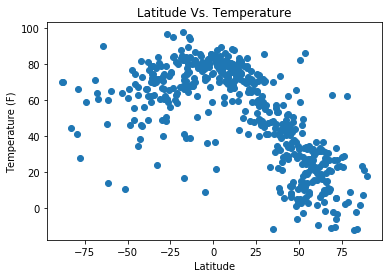

In [12]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(my_new_data["Latitude"],my_new_data["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#sns.set()
plt.savefig("Latitude Vs Temperature Scatter Plot.png")
plt.show()

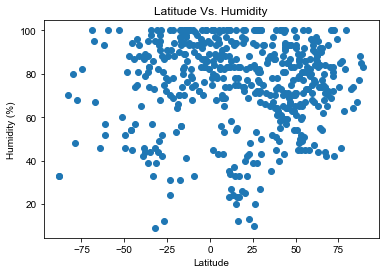

In [13]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(my_new_data["Latitude"],my_new_data["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.savefig("Humidity Vs. Latitude Scatter Plot.png")
plt.show()

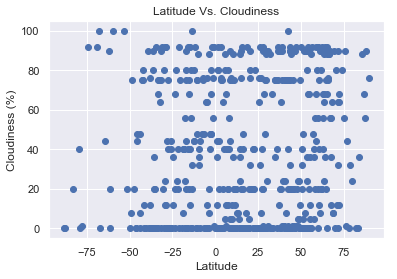

In [14]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(my_new_data["Latitude"],my_new_data["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.savefig("Cloudiness Vs. Latitude Scatter Plot.png")
plt.show()

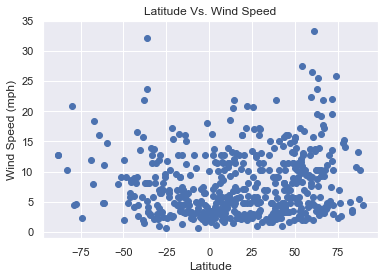

In [15]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(my_new_data["Latitude"],my_new_data["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.savefig("Wind Speed Vs. Latitude Scatter Plot.png")
plt.show()

In [ ]:
WorldCityWeather = my_new_data.to_csv("World_City_Weather.csv, header=True, index=True")